# Crop recommendation system

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load dataset
df=pd.read_csv("D:\Data Set\Crop_recommendation.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


### Data preprocessing

In [3]:

df.shape

(2200, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [7]:
df.duplicated().sum()

0

In [8]:
df.iloc[:,:7].corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


### Exploring data

<Axes: xlabel='label', ylabel='count'>

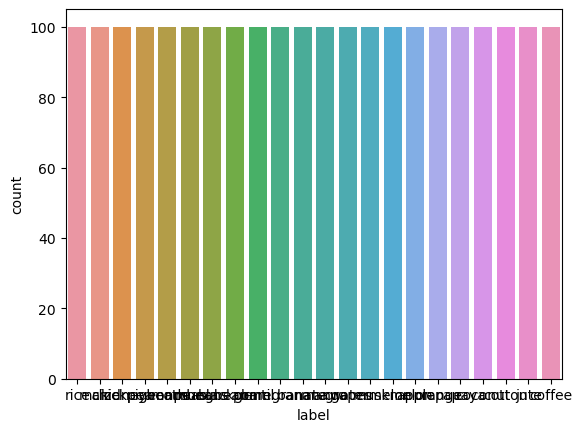

In [9]:
sns.countplot(x=df['label'])

In [10]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

<Axes: ylabel='count'>

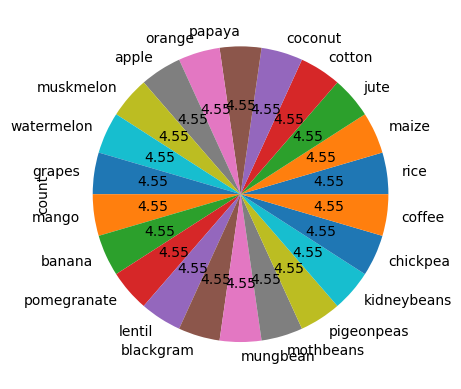

In [11]:
df['label'].value_counts().plot(kind='pie',autopct="%.2f")

C:\Users\prash\AppData\Local\Temp\ipykernel_14544\3495388122.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['N'])
C:\Users\prash\AppData\Local\Temp\ipykernel_14544\3495388122.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['P'])
C:\Users\prash\AppData\Local\Temp\ipykernel_14544\34

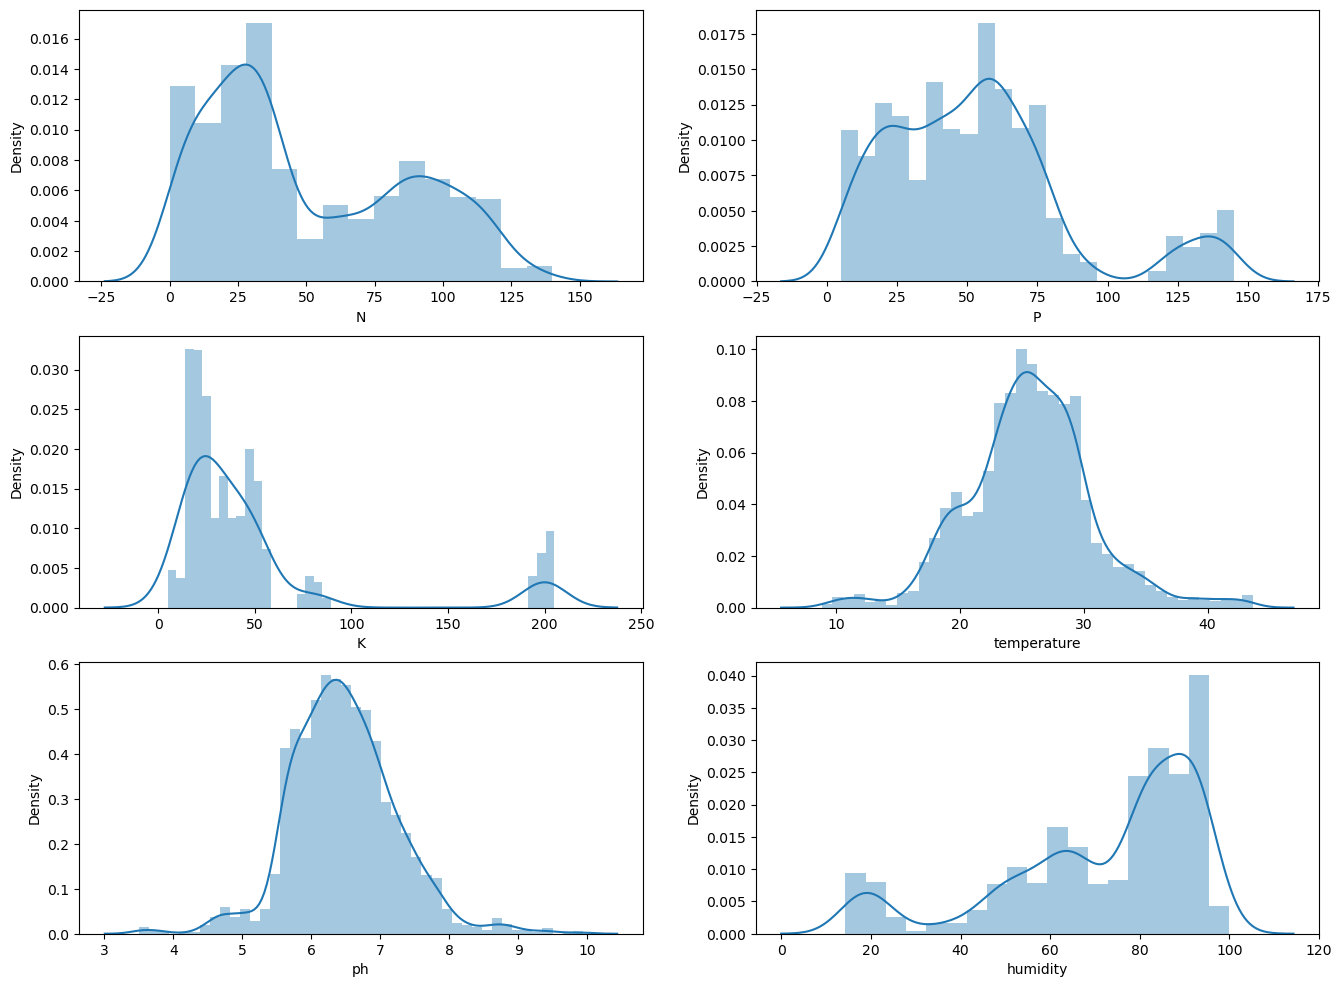

In [12]:
plt.figure(figsize=(16,12))
plt.subplot(3,2,1)
sns.distplot(df['N'])

plt.subplot(3,2,2)
sns.distplot(df['P'])

plt.subplot(3,2,3)
sns.distplot(df['K'])

plt.subplot(3,2,4)
sns.distplot(df['temperature'])

plt.subplot(3,2,5)
sns.distplot(df['ph'])

plt.subplot(3,2,6)
sns.distplot(df['humidity'])

plt.show()

### Outliers detection and removel

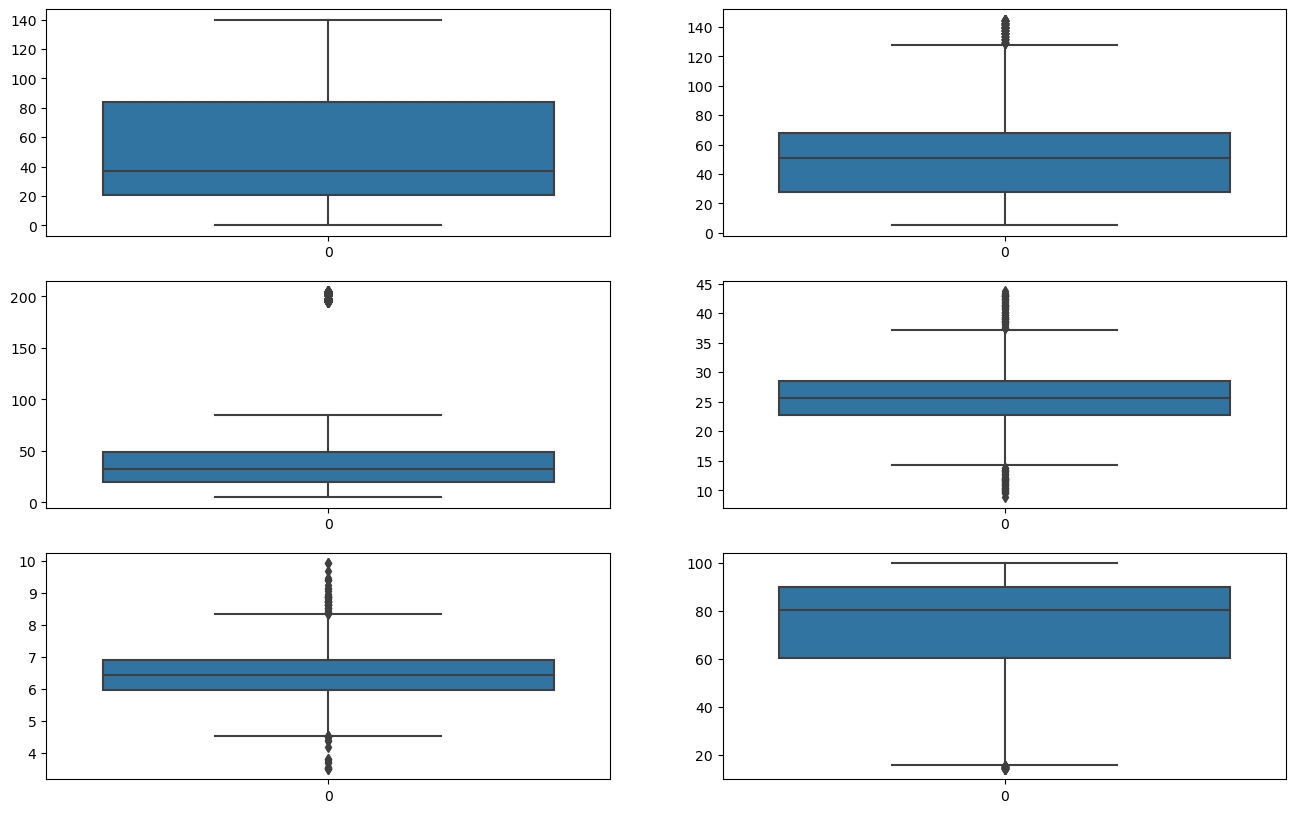

In [13]:
plt.figure(figsize=(16,10))
plt.subplot(3,2,1)
sns.boxplot(df['N'])

plt.subplot(3,2,2)
sns.boxplot(df['P'])

plt.subplot(3,2,3)
sns.boxplot(df['K'])

plt.subplot(3,2,4)
sns.boxplot(df['temperature'])

plt.subplot(3,2,5)
sns.boxplot(df['ph'])

plt.subplot(3,2,6)
sns.boxplot(df['humidity'])

plt.show()

<Axes: >

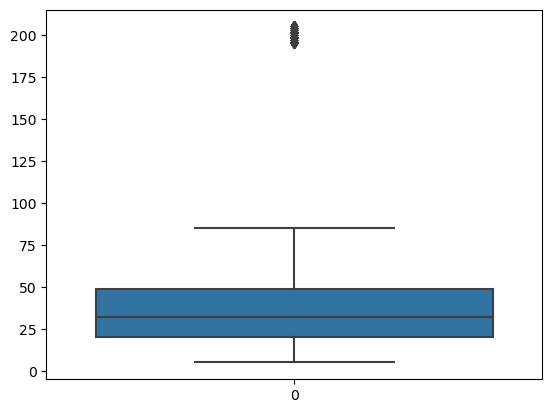

In [14]:
# The potassium column has many outliers, so we will remove them
sns.boxplot(df['K'])

In [15]:
#Using interquartile range we will calculate maximum and minimum values
q1=df['K'].quantile(0.25)
q3=df['K'].quantile(0.75)
q1

20.0

In [16]:
#IQR=q3-q1
iqr=q3-q1
maximum=q3+1.5*iqr
minimum=q1-1.5*iqr
iqr

29.0

In [17]:
df['K'].describe()

count    2200.000000
mean       48.149091
std        50.647931
min         5.000000
25%        20.000000
50%        32.000000
75%        49.000000
max       205.000000
Name: K, dtype: float64

In [18]:
print(maximum)
print(minimum)

92.5
-23.5


In [19]:
# outliers are only on maximum value side
#outliers
df[df['K']>maximum]

,N,P,K,temperature,humidity,ph,rainfall,label
1200,24,130,195,29.996772,81.541566,6.112306,67.125345,grapes
1201,13,144,204,30.728040,82.426141,6.092242,68.381355,grapes
1202,22,123,205,32.445778,83.885049,5.896343,68.739325,grapes
1203,36,125,196,37.465668,80.659687,6.155261,66.838723,grapes
1204,24,131,196,22.032962,83.743728,5.732454,65.344408,grapes
...,...,...,...,...,...,...,...,...
1595,40,120,197,23.805938,92.488795,5.889481,119.633555,apple
1596,25,132,198,22.319441,90.851744,5.732758,100.117344,apple
1597,31,137,196,22.144641,93.825674,6.400321,120.631078,apple
1598,36,144,196,23.651676,94.505288,6.496934,115.361127,apple


In [20]:
# we cannot trim them because two categories will be removed, so let's perform capping
df['K']=np.where(
      df['K']>maximum,
       maximum,
       df['K']
)


In [21]:
df.iloc[1200:1600,:].sample(10)

,N,P,K,temperature,humidity,ph,rainfall,label
1409,108,26,52.0,28.826290,94.267653,6.201798,26.238385,muskmelon
1515,30,143,92.5,23.768816,90.598103,5.798351,102.264855,apple
1398,83,23,55.0,26.897502,83.892415,6.463271,43.971937,watermelon
1574,2,129,92.5,22.782342,94.368035,5.682344,122.144995,apple
1362,111,6,53.0,26.493064,88.591431,6.313513,46.063822,watermelon
1212,9,122,92.5,29.587484,80.919344,5.570291,68.064173,grapes
1507,0,123,92.5,22.027754,92.961295,5.790993,121.134918,apple
1476,80,18,52.0,27.873174,91.148496,6.484800,24.052079,muskmelon
1594,35,145,92.5,22.039115,94.580758,6.231950,110.980401,apple
1306,85,27,45.0,26.071376,88.728566,6.467096,57.796528,watermelon


<Axes: >

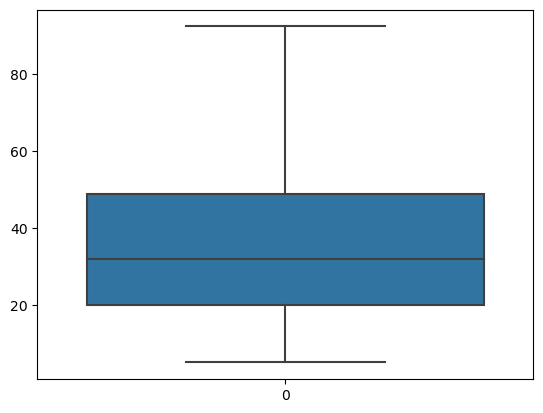

In [22]:
sns.boxplot(df['K'])

### Train Test split

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,:7],df['label'],test_size=0.2,random_state=42)

In [24]:
X_train

,N,P,K,temperature,humidity,ph,rainfall
1656,17,16,14.0,16.396243,92.181519,6.625539,102.944161
752,37,79,19.0,27.543848,69.347863,7.143943,69.408782
892,7,73,25.0,27.521856,63.132153,7.288057,45.208411
1041,101,70,48.0,25.360592,75.031933,6.012697,116.553145
1179,0,17,30.0,35.474783,47.972305,6.279134,97.790725
...,...,...,...,...,...,...,...
1638,10,5,5.0,21.213070,91.353492,7.817846,112.983436
1095,108,94,47.0,27.359116,84.546250,6.387431,90.812505
1130,11,36,31.0,27.920633,51.779659,6.475449,100.258567
1294,11,124,92.5,13.429886,80.066340,6.361141,71.400430


In [25]:
# pd.DataFrame(y_train) or
y_train

1656       orange
752     blackgram
892        lentil
1041       banana
1179        mango
          ...    
1638       orange
1095       banana
1130        mango
1294       grapes
860        lentil
Name: label, Length: 1760, dtype: object

### Encoding categorical data

In [26]:
#label/output column is categorical, hence we will apply here label_encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(y_train)

LabelEncoder()

In [27]:
le.classes_

array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object)

In [28]:
y_train=le.transform(y_train)
y_test=le.transform(y_test)
y_train

array([16,  2, 10, ..., 12,  7, 10])

### different models and their accuracy

In [29]:
from sklearn.metrics import accuracy_score

#### 1. Logistic regression

In [30]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)
print("Accuracy is ",accuracy_score(y_test,y_pred))

Accuracy is  0.9454545454545454


C:\Users\prash\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### 2. Naive Bayes

In [31]:
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()
NB.fit(X_train,y_train)
y_pred2=NB.predict(X_test)
print("Accuracy is ",accuracy_score(y_test,y_pred2))

Accuracy is  0.9954545454545455


#### 3.KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred3=knn.predict(X_test)
print("Accuracy is ",accuracy_score(y_test,y_pred3))

Accuracy is  0.9704545454545455


#### 4.SVM

In [33]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)
y_pred4=svm.predict(X_test)
print("Accuracy is ",accuracy_score(y_test,y_pred4))

Accuracy is  0.9613636363636363


#### 5. Decision tree

In [34]:
from sklearn.tree import ExtraTreeClassifier
DT=ExtraTreeClassifier()
DT.fit(X_train,y_train)
y_pred5=DT.predict(X_test)
print("Accuracy is ",accuracy_score(y_test,y_pred5))

Accuracy is  0.875


#### 6.Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(X_train,y_train)
y_pred6=RF.predict(X_test)
print("Accuracy is ",accuracy_score(y_test,y_pred6))

Accuracy is  0.9931818181818182


### Selection of appropriate model and prediction

In [36]:
# Because naive_bayes has highest accuracy hence we select it for our model
result=NB.predict(df.iloc[:1,:7])
le.inverse_transform(result)

array(['rice'], dtype=object)

In [37]:
result=NB.predict(df.iloc[1197:1305,:7])
le.inverse_transform(result)

array(['mango', 'mango', 'mango', 'grapes', 'grapes', 'grapes', 'grapes',
       'grapes', 'grapes', 'grapes', 'grapes', 'grapes', 'grapes',
       'grapes', 'grapes', 'grapes', 'grapes', 'grapes', 'grapes',
       'grapes', 'grapes', 'grapes', 'grapes', 'grapes', 'grapes',
       'grapes', 'grapes', 'grapes', 'grapes', 'grapes', 'grapes',
       'grapes', 'grapes', 'grapes', 'grapes', 'grapes', 'grapes',
       'grapes', 'grapes', 'grapes', 'grapes', 'grapes', 'grapes',
       'grapes', 'grapes', 'grapes', 'grapes', 'grapes', 'grapes',
       'grapes', 'grapes', 'grapes', 'grapes', 'grapes', 'grapes',
       'grapes', 'grapes', 'grapes', 'grapes', 'grapes', 'grapes',
       'grapes', 'grapes', 'grapes', 'grapes', 'grapes', 'grapes',
       'grapes', 'grapes', 'grapes', 'grapes', 'grapes', 'grapes',
       'grapes', 'grapes', 'grapes', 'grapes', 'grapes', 'grapes',
       'grapes', 'grapes', 'grapes', 'grapes', 'grapes', 'grapes',
       'grapes', 'grapes', 'grapes', 'grapes', 'grapes'